In [1]:
import tensorflow as tf
from PIL import Image
import numpy 
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow_model_optimization as tfmot
import pickle

In [2]:
TF_MODEL_FILE_PATH = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [3]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['dense_5']}}

In [4]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [18]:
image_path = "13567_2013_Article_234_Fig2_HTML.jpg";
img = Image.open(image_path).resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [19]:
class_mapping = {
    6: b'Viral diseases White tail disease',
    1: b'Bacterial diseases - Aeromoniasis',
    3: b'Fungal diseases Saprolegniasis',
    4: b'Healthy Fish',
    5: b'Parasitic diseases',
    2: b'Bacterial gill disease',
    0: b'Bacterial Red disease'
}
class_mapping_str = {key: value.decode('utf-8') for key, value in class_mapping.items()}
class_mapping = dict(sorted(class_mapping_str.items()))
class_mapping

{0: 'Bacterial Red disease',
 1: 'Bacterial diseases - Aeromoniasis',
 2: 'Bacterial gill disease',
 3: 'Fungal diseases Saprolegniasis',
 4: 'Healthy Fish',
 5: 'Parasitic diseases',
 6: 'Viral diseases White tail disease'}

In [20]:
predictions_lite = classify_lite(sequential_2_input=img_array)['dense_5']
score_lite = tf.nn.softmax(predictions_lite)
score_lite


<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[0.1219442 , 0.13117898, 0.2200479 , 0.12291176, 0.12106627,
        0.16070877, 0.12214217]], dtype=float32)>

Prediction for Bacterial Red disease: 0.008341334760189056
Prediction for Bacterial diseases - Aeromoniasis: 0.0813402608036995
Prediction for Bacterial gill disease: 0.5986230373382568
Prediction for Fungal diseases Saprolegniasis: 0.016244452446699142
Prediction for Healthy Fish: 0.0011158953420817852
Prediction for Parasitic diseases: 0.284371554851532
Prediction for Viral diseases White tail disease: 0.009963487274944782


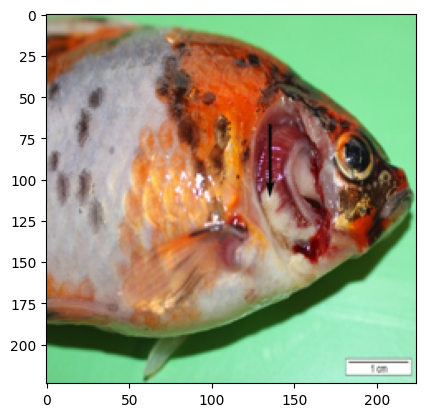

In [21]:
plt.imshow(img)
for i in range(len(predictions_lite[0])):
    prediction_value = predictions_lite[0][i]
    class_name = class_mapping[i]  # Convert byte string to utf-8 string
    print(f'Prediction for {class_name}: {prediction_value}')